# Description:

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don't have a rating. So, we have to build an application which can predict the rating by seeing the review.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"C:\Poovarasi\Rate Prediction Project\Rate_Prediction.xlsx")
df.head()

,Unnamed: 0,review_title,review_text,ratings
0,0,Worth every penny,Best part is super battery. More than Wow 💖. S...,5
1,1,Super!,Best mobile,5
2,2,Nice,Its sound is not clear,3
3,3,Good quality product,Good phone,4
4,4,Perfect product!,Best phone in this price.. Amazing!,5


In [3]:
#dropping "Unnamed: 0" column
df.drop(columns={"Unnamed: 0","review_title"},inplace=True)

In [4]:
df.shape

(31480, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  31480 non-null  object
 1   ratings      31480 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 492.0+ KB


# checking for missing values

In [6]:
df.isnull().sum()

review_text    0
ratings        0
dtype: int64

There is no null values in our dataset

In [7]:
df['length'] = df['review_text'].str.len()
df.head()

,review_text,ratings,length
0,Best part is super battery. More than Wow 💖. S...,5,101
1,Best mobile,5,11
2,Its sound is not clear,3,22
3,Good phone,4,10
4,Best phone in this price.. Amazing!,5,35


'review_title' column can be dropped

<AxesSubplot:xlabel='length', ylabel='Density'>

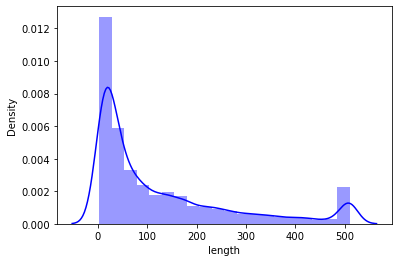

In [8]:
sns.distplot(df.length,bins=20,color='blue')

# Data Preprocessing

In [9]:
import re
import string

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [11]:
lemmatizer = WordNetLemmatizer()

In [12]:
#converting all messages to lower case
df['review_text'] = df['review_text'].str.lower()

#replacing email address with 'email'
df['review_text'] = df['review_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email')

#replacing URLs with 'webaddress'
df['review_text'] = df['review_text'].str.replace(r'^http\://[a-zA-Z0-9\-\-.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

#replace symbols with dollar
df['review_text'] = df['review_text'].str.replace(r'£|\$','dollars')

#replace 10 digit numbers with 'phonenumber'
df['review_text'] = df['review_text'].str.replace(r'^\(?[\d]{3}\?[\s-][\d]{3}[\s-]?[\d]{4}$','phonenumber')

#Replacing number with num
df['review_text'] = df['review_text'].str.replace(r'\d+(\.\d+)?','num')


In [13]:
df['review_text'] =df['review_text'].astype(str)

In [14]:
df['review_text'] = df['review_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

In [15]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['review_text'] = df['review_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [16]:
lem = WordNetLemmatizer()
df['review_text'] = df['review_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [17]:
df['modified_length'] = df.review_text.str.len()
df.head()

,review_text,ratings,length,modified_length
0,best part super battery. wow 💖. special button...,5,101,74
1,best mobile,5,11,11
2,sound clear,3,22,11
3,good phone,4,10,10
4,best phone price.. amazing!,5,35,27


In [18]:
print('original length',df.length.sum())
print('modified_length',df.modified_length.sum())

original length 3924199
modified_length 2895794


In [19]:
label = df.ratings
text = df.review_text

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
x = cv.fit_transform(text)

In [21]:
x

<31480x8471 sparse matrix of type '<class 'numpy.int64'>'
	with 378828 stored elements in Compressed Sparse Row format>

In [22]:
y = label

Balancing imbalance data set

In [23]:
from imblearn.over_sampling import SMOTE as sm

x,y = sm().fit_resample(x,y)

In [24]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [25]:
from wordcloud import WordCloud

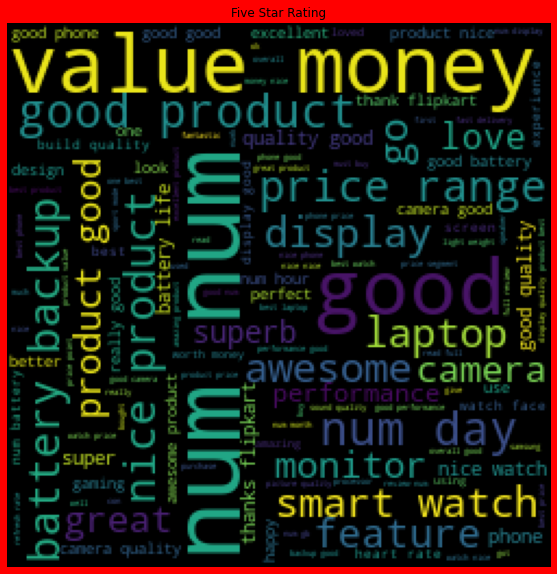

In [26]:
five_star = df['review_text'][df['ratings']==5]
wrdcld = WordCloud(width=250,height=250,background_color='black',max_words=400).generate(' '.join(five_star))
plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Five Star Rating')
plt.show()

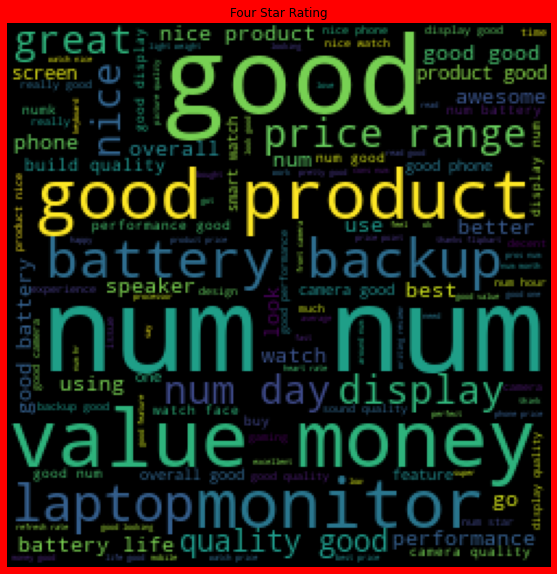

In [27]:
four_star = df['review_text'][df['ratings']==4]
wrdcld = WordCloud(width=250,height=250,background_color='black',max_words=400).generate(' '.join(four_star))
plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Four Star Rating')
plt.show()

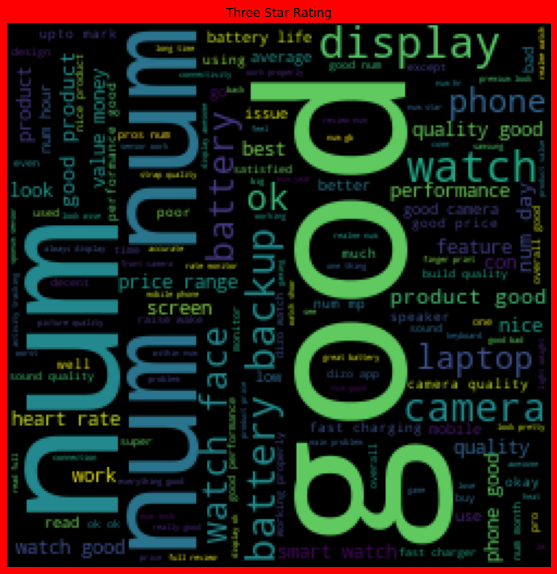

In [28]:
three_star = df['review_text'][df['ratings']==3]
wrdcld = WordCloud(width=250,height=250,background_color='black',max_words=400).generate(' '.join(three_star))
plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Three Star Rating')
plt.show()

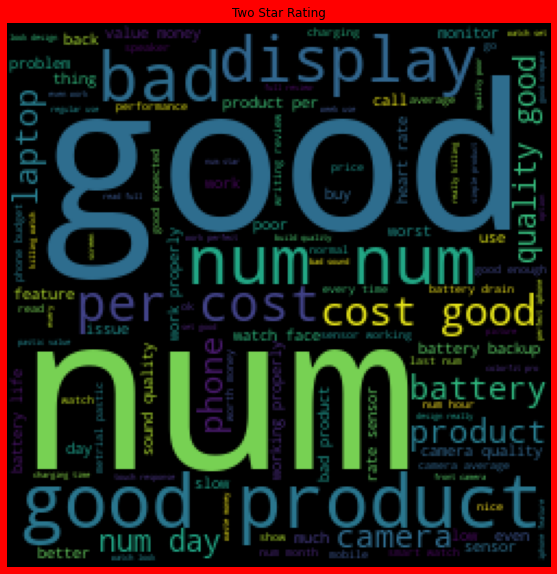

In [29]:
two_star = df['review_text'][df['ratings']==2]
wrdcld = WordCloud(width=250,height=250,background_color='black',max_words=400).generate(' '.join(two_star))
plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Two Star Rating')
plt.show()

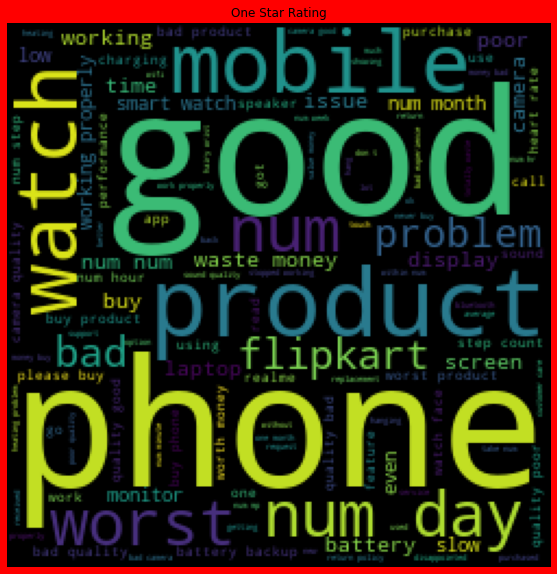

In [30]:
one_star = df['review_text'][df['ratings']==1]
wrdcld = WordCloud(width=250,height=250,background_color='black',max_words=400).generate(' '.join(one_star))
plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='One Star Rating')
plt.show()

# Selecting Parameters for Training

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
acc = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=.22)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    temp = accuracy_score(y_test,y_pred)
    if temp>acc:
        acc = temp
        best_rstate = i
        
print("Accuracy : ",acc*100,"RandomState : ",best_rstate)

Accuracy :  71.4369980489133 RandomState :  962


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = best_rstate)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, cross_validate, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics
import xgboost as xgb

In [35]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()
gbr = GradientBoostingClassifier()
dtc = DecisionTreeClassifier()
etc = ExtraTreeClassifier()

model = [lr,rfc,ada,gbr,dtc,etc]

In [36]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    
    print("Accuracy Score ",m," is ", accuracy_score(y_test,predm))
    print("Confusion Matrix is \n",confusion_matrix(y_test,predm))
    print("Classification report is \n",classification_report(y_test,predm))
    print("\n\n")

Accuracy Score  LogisticRegression()  is  0.7114678166427089
Confusion Matrix is 
 [[3923  688  325   86   21]
 [ 546 3868  430  117    4]
 [ 261  539 3523  421  234]
 [ 101  219  827 3138  759]
 [  83  112  495  958 3366]]
Classification report is 
               precision    recall  f1-score   support

           1       0.80      0.78      0.79      5043
           2       0.71      0.78      0.74      4965
           3       0.63      0.71      0.67      4978
           4       0.66      0.62      0.64      5044
           5       0.77      0.67      0.72      5014

    accuracy                           0.71     25044
   macro avg       0.71      0.71      0.71     25044
weighted avg       0.71      0.71      0.71     25044




Accuracy Score  RandomForestClassifier()  is  0.7889314805941543
Confusion Matrix is 
 [[3941  715  288   81   18]
 [ 237 4161  457   96   14]
 [ 109  414 4102  260   93]
 [  40  121  825 3788  270]
 [  40   41  484  683 3766]]
Classification report is 
   

# Cross Validation:

In [37]:
mean = []
std = []

for m in model:
    CV = cross_val_score(m,x,y,cv=5)
    print("Score of ",m,"is", CV)
    print("Mean Score of ",m ,"is",CV.mean())
    mean.append(CV.mean())
    print("Standard Deviation is ",CV.std())
    std.append(CV.std())
    print("\n")

Score of  LogisticRegression() is [0.67127527 0.65989518 0.68335413 0.64387322 0.63878213]
Mean Score of  LogisticRegression() is 0.6594359870227102
Standard Deviation is  0.016620700559442564


Score of  RandomForestClassifier() is [0.76386324 0.75692538 0.77963564 0.73356626 0.74544547]
Mean Score of  RandomForestClassifier() is 0.7558871974045421
Standard Deviation is  0.015722197263250973


Score of  AdaBoostClassifier() is [0.43638632 0.44527078 0.44327427 0.46064387 0.47057649]
Mean Score of  AdaBoostClassifier() is 0.4512303468929374
Standard Deviation is  0.012506385852456187


Score of  GradientBoostingClassifier() is [0.56416272 0.54903918 0.57993511 0.54509608 0.56031944]
Mean Score of  GradientBoostingClassifier() is 0.5597105066134265
Standard Deviation is  0.01230192083104044


Score of  DecisionTreeClassifier() is [0.73616172 0.74100324 0.75273272 0.7088595  0.71235338]
Mean Score of  DecisionTreeClassifier() is 0.7302221113052159
Standard Deviation is  0.016934532687689

# HyperTuning

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[20,50,100],
              'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2']}]

rf = RandomForestClassifier(random_state=42,n_jobs=-1)


In [39]:
rf_random = GridSearchCV(rf,param_grid,cv=5)

In [40]:
rf_random.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [20, 50, 100]}])

In [41]:
rf_random.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}

In [42]:
rf_random.best_score_

0.7828859142766145

In [43]:
preds = cross_val_predict(rf_random.best_estimator_,x_train,y_train,cv=5,n_jobs=-1)

In [44]:
preds

array([4, 4, 4, ..., 3, 4, 2], dtype=int64)

In [45]:
predy = rfc.predict(x_test)
predy

array([4, 3, 1, ..., 2, 4, 3], dtype=int64)

In [46]:
classifier_final_model = rf_random.best_estimator_
y_pred = classifier_final_model.predict(x_test)

# AUC ROC

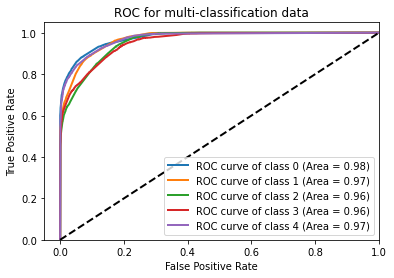

In [47]:
# Plotting ROC curve for all the models
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

classifier = OneVsRestClassifier(classifier_final_model)
y_sco = classifier.fit(x_train, y_train).predict_proba(x_test)

y_test_bin  = label_binarize(y_test, classes=[1,2,3,4,5])
n_classes = 5

false_pr = dict()
true_pr = dict()
roc_auc = dict()
for i in range(n_classes):
    false_pr[i], true_pr[i], _ = roc_curve(y_test_bin[:, i], y_sco[:, i])
    roc_auc[i] = auc(false_pr[i], true_pr[i])
   
for i in range(n_classes):
    plt.plot(false_pr[i], true_pr[i], lw=2,
             label='ROC curve of class {0} (Area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-classification data')
plt.legend(loc="lower right")
plt.show()

# Saving the best model

In [48]:
import joblib
joblib.dump(predy,"RatePredictionProject.pkl")

['RatePredictionProject.pkl']

**Loading the model**

In [49]:
mod=joblib.load("RatePredictionProject.pkl")